In [13]:
import control as ct
import numpy as np
import numpy.linalg as la
from matplotlib import rcParams
import matplotlib.pyplot as plt

font_dict={'fontsize': rcParams['axes.titlesize'],
 'fontweight': rcParams['axes.titleweight'],
 'color': rcParams['axes.titlecolor'],
 'verticalalignment': 'baseline',
 'horizontalalignment': 'center'}

In [18]:
def phase_mag_resp(resp_3d):
    t1 = []
    resp_3d_mag = []
    resp_3d_ph_theta = []
    resp_3d_ph_phi = []

    for i in range(len(resp_3d.states[0])):
        t1.append(i)
        x = resp_3d.states[0, i]
        y = resp_3d.states[1, i]
        z = resp_3d.states[2, i]
        
        resp_3d_mag.append(np.linalg.norm(np.array([x,y,z])))
        
        resp_3d_ph_theta.append(np.arctan2(np.sqrt(x**2 + y**2),z))
        resp_3d_ph_phi.append(np.arctan2(y,x))
        
    return t1, resp_3d_mag, resp_3d_ph_theta, resp_3d_ph_phi

def eval_evec(A):
    w, v = la.eig(A)
    print(A)
    print("Eigenvalues: ")
    print(w)
    print("Eigenvectors: ")
    print(v)
#     for k in range(len(v[0])):
#         print("v["+str(k)+"]:")
#         print(v[::k])

[[-1 -1  2]
 [ 1 -1  3]
 [ 1 -1 -1]]
Eigenvalues: 
[-2.32826886+0.j        -0.33586557+1.8229711j -0.33586557-1.8229711j]
Eigenvectors: 
[[ 0.85688181+0.j          0.23194141+0.41437196j  0.23194141-0.41437196j]
 [ 0.30066884+0.j          0.80166039+0.j          0.80166039-0.j        ]
 [-0.41875029+0.j          0.10015628+0.34901059j  0.10015628-0.34901059j]]
[[ 0  1  1]
 [-1  0  1]
 [-1 -1  0]]
Eigenvalues: 
[-6.93889390e-18+1.73205081j -6.93889390e-18-1.73205081j
 -4.43208915e-19+0.j        ]
Eigenvectors: 
[[-0.57735027+0.j  -0.57735027-0.j   0.57735027+0.j ]
 [-0.28867513-0.5j -0.28867513+0.5j -0.57735027+0.j ]
 [ 0.28867513-0.5j  0.28867513+0.5j  0.57735027+0.j ]]


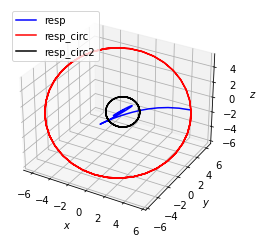

In [19]:
# 3D example:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
A = np.array([[-1, -1, 2], [1, -1, 3], [1, -1, -1]])
Acirc = np.array([[0, 1, 1], [-1, 0, 1], [-1, -1, 0]])
eval_evec(A)
eval_evec(Acirc)

sys= ct.ss([[-1, -1, 2], [1, -1, 3], [1, -1, -1]], np.zeros(3), np.array([1,1,1]), 0) # A2
sys_circ= ct.ss([[0, 1, 1], [-1, 0, 1], [-1, -1, 0]], np.zeros(3), np.array([1,1,1]), 0) # A2

resp = ct.initial_response(sys, 10, [5, 5, -1])
resp_circ = ct.initial_response(sys_circ, 10, [5, 5, -1])
resp_circ2 = ct.initial_response(sys_circ, 10, [0, 0, 2])

ax.plot(resp.states[0], resp.states[1], resp.states[2], "-b", label="resp")
ax.plot(resp_circ.states[0], resp_circ.states[1], resp_circ.states[2], "-r", label="resp_circ")
ax.plot(resp_circ2.states[0], resp_circ2.states[1], resp_circ2.states[2], "-k", label="resp_circ2")
ax.set_xlabel('$x$') 
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')


plt.legend(loc="upper left")

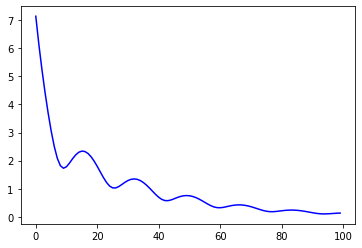

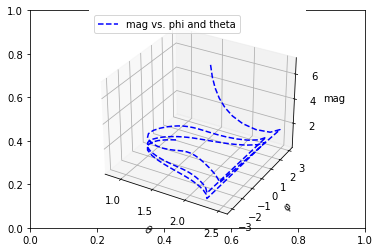

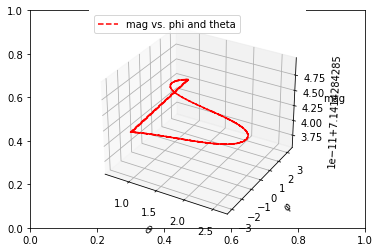

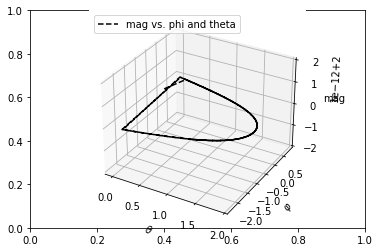

In [12]:
T, resp_mag, resp_ph_theta, resp_ph_phi = phase_mag_resp(resp)
T, resp_mag_c, resp_ph_theta_c, resp_ph_phi_c = phase_mag_resp(resp_circ)
T, resp_mag_c2, resp_ph_theta_c2, resp_ph_phi_c2 = phase_mag_resp(resp_circ2)


fig4, ax4 = plt.subplots()
ax4.plot(T, resp_mag, 'b', label="mag")

fig5, ax5 = plt.subplots()
ax5 = fig5.add_subplot(projection='3d')
ax5.plot(resp_ph_theta, resp_ph_phi, resp_mag, 'b--', label="mag vs. phi and theta")
ax5.set_xlabel(r'$\theta$') 
ax5.set_ylabel(r'$\varphi$')
ax5.set_zlabel('mag')
plt.legend(loc="upper left")

fig6, ax6 = plt.subplots()
ax6 = fig6.add_subplot(projection='3d')
ax6.plot(resp_ph_theta_c, resp_ph_phi_c, resp_mag_c, 'r--', label="mag vs. phi and theta")
ax6.set_xlabel(r'$\theta$') 
ax6.set_ylabel(r'$\varphi$')
ax6.set_zlabel('mag')
plt.legend(loc="upper left")

fig7, ax7 = plt.subplots()
ax7 = fig7.add_subplot(projection='3d')
ax7.plot(resp_ph_theta_c2, resp_ph_phi_c2, resp_mag_c2, 'k--', label="mag vs. phi and theta")
ax7.set_xlabel(r'$\theta$') 
ax7.set_ylabel(r'$\varphi$')
ax7.set_zlabel('mag')
plt.legend(loc="upper left")

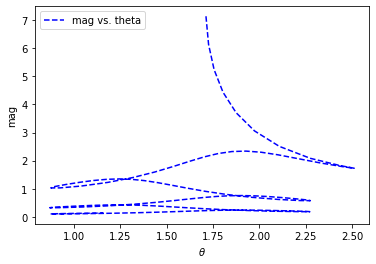

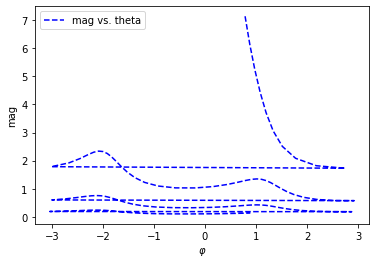

In [7]:
# Magnitude vs. Phase

fig8, ax8 = plt.subplots()
ax8.plot(resp_ph_theta, resp_mag, 'b--', label="mag vs. theta")
ax8.set_xlabel(r'$\theta$') 
ax8.set_ylabel('mag')
plt.legend(loc="upper left")

fig9, ax9 = plt.subplots()
ax9.plot(resp_ph_phi, resp_mag, 'b--', label="mag vs. theta")
ax9.set_xlabel(r'$\varphi$') 
ax9.set_ylabel('mag')
plt.legend(loc="upper left")

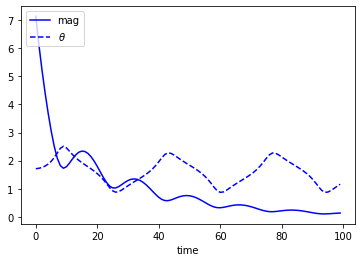

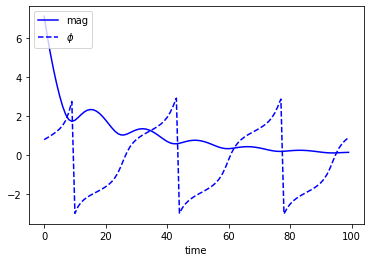

In [8]:
# Mag and phase vs. time
fig10, ax10 = plt.subplots()
ax10.plot(T, resp_mag, 'b', label="mag")
ax10.plot(T, resp_ph_theta, 'b--', label=r"$\theta$")
ax10.set_xlabel('time') 
plt.legend(loc="upper left")

fig11, ax11 = plt.subplots()
ax11.plot(T, resp_mag, 'b', label="mag")
ax11.plot(T, resp_ph_phi, 'b--', label=r"$\phi$")
ax11.set_xlabel('time') 
plt.legend(loc="upper left")

In [ ]:
t = []
resp_mag = []
for i in range(len(resp.states[0])):
    t.append(i)
    resp_mag.append(np.linalg.norm(np.array([resp.states[0,i], resp.states[1,i]])))
    
fig3, ax3 = plt.subplots()
ax3.plot(t, resp_mag, label="switched")
plt.legend(loc="upper left")